In [30]:
pip install pycstruct

Note: you may need to restart the kernel to use updated packages.


1921


TypeError: none of the 2 overloaded methods succeeded. Full details:
  TFitResultPtr TH1::Fit(TF1* f1, const char* option = "", const char* goption = "", double xmin = 0, double xmax = 0) =>
    TypeError: RBWGaus() missing 2 required positional arguments: 'xx' and 'fbw'
  TFitResultPtr TH1::Fit(const char* formula, const char* option = "", const char* goption = "", double xmin = 0, double xmax = 0) =>
    TypeError: could not convert argument 1 (bad argument type for built-in operation)

======> EVENT:0
 Zmass           = 80.9184
 Zpt             = 0.883632
 Zeta            = -6.1385
 Zphi            = -1.67533
 Zrapidity       = 1.19323
 Zcharge         = 0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: tc


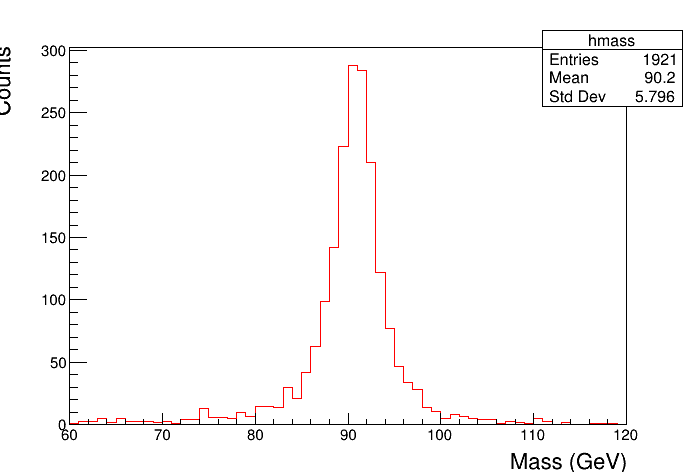

In [90]:
import ROOT

      #Fit parameters:
      #par[0]=Width (scale) Breit-Wigner
      #par[1]=Most Probable (MP, location) Breit mean
      #par[2]=Total area (integral -inf to inf, normalization constant)
      #par[3]=Width (sigma) of convoluted Gaussian function

def RBWGaus(x, par, xx, fbw):

    np = 100 # #number of convolution steps
    sc = 4 #convolution extends to +-sc Gaussian sigmas

          #Range of convolution integral
    xmin = x[0] - sc * par[3]
    xmax = x[0] + sc * par[3]
    step = (xmax-xmin) / np
    
      # Convolution integral of Breit-Wigner and Gaussian by sum
    sum = 0.0

###

    for i in range (1, np/2):
        xx = xmin + (i-.5) * step
        fbw = ROOT.BreitWigner(xx,par[1],par[0])
        sum += fbw * ROOT.Gaus(x[0],xx,par[3])

        xx = xmax - (i-.5) * step
        fbw = ROOT.BreitWigner(xx,par[1],par[0])
        sum += fbw * ROOT.Gaus(x[0],xx,par[3])
    return (par[2] * step * sum * (1./sqrt(2*ROOT.Pi())) / par[3])


c = ROOT.TCanvas()

inf = ROOT.TFile.Open("Zbosons.root")
ztree = inf.Get("ztree")
ztree.Show (0) # printa as variáveis que estão na tree nesse evento 0
N = ztree.GetEntries ()
print (N)
hmass = ROOT.TH1F("hmass","", 60,60,120)

for j in range(0, ztree.GetEntries()):

    ztree.GetEntry(j)

    if(ztree.Zcharge != 0):
        continue

    hmass.Fill(ztree.Zmass)
    hmass.Draw()
    c.Draw()

tc = ROOT.TCanvas("tc","Dimuon mass", 600, 600)

tc.SetTopMargin(0.05)
tc.SetRightMargin(0.05)
tc.SetBottomMargin(0.12)
tc.SetLeftMargin(0.13)
tc.SetTickx(1)
tc.SetTicky(1)



hmass.SetMarkerStyle(20)
hmass.SetMarkerColor(ROOT.kRed)
hmass.SetLineColor(ROOT.kRed)
hmass.GetXaxis().SetTitle("Mass (GeV)")
hmass.GetYaxis().SetTitle("Counts")
hmass.GetXaxis().SetTitleSize(0.05)
hmass.GetYaxis().SetTitleSize(0.05)  
hmass.GetYaxis().SetTitleOffset(1.2)


f = ROOT.TF1("f", RBWGaus ,60,120,4) #ROBLEMA AQUI


f.SetParameters(2.495, 91.0, 2000.0, 2.0)
f.SetParNames("BW width","BW mean","Area","Sigma")
f.FixParameter(0, 2.495) #/PDG value
f.SetParLimits(1, 86, 96)
f.SetLineColor(ROOT.kBlue) 

hmass.Fit(f,"RNS","")
hmass.Draw("ep")
f.Draw("same")

In [95]:
l = ROOT.TLegend(0.18,0.78,0.34,0.90)
l.SetTextSize(0.04)
l.AddEntry(hmass,"Z#rightarrow#mu#mu","lp") # ???
l.AddEntry(f,"Fit","l")
l.Draw()

tx = ROOT.TLatex()
tx.SetTextSize(0.03)
tx.SetTextAlign(12)
tx.SetTextFont(42)
tx.SetNDC(ROOT.kTRUE)

tx.DrawLatex(0.63,0.87,ROOT.Form("#chi^{2}/ndf = %g/%d",hmass.Chi2(),hmass.Ndf()))
tx.DrawLatex(0.63,0.83,ROOT.Form("Yield = %g#pm%g",ff.Parameter(2),ff.ParError(2)))

tc.SaveAs("Zpeak.png")

AttributeError: 'TH1F' object has no attribute 'Chi2'